# Introducción:
### Tematica:
La temática a desarrollar consta de un dataset conformado por las medidas de distintas partes del cuerpo, de distintos pingüinos divididos en 3 especies autóctonas de una región de la antártida denominada archipiélago Palmer.
### Objetivo:
El objetivo de esta investigación es poder desarrollar un algoritmo capaz de clasificar a los pingüinos según la especie y género, intentando ver cual es la combinación de factores mínima que llegue a un resultado consistente.
### Meta:
La utilidad que brinda esta investigación es la posibilidad de que el algoritmo permita determinar  la población de los pingüinos sin necesidad de que un biólogo tenga que estar viendo horas de filmación y llevando la cuenta de manera exhaustiva y manual.
### Las incógnitas que debemos resolver son :
1. ¿Que factores son los más determinantes?
2. ¿Hay una combinación de dos o tres factores que sea suficiente para clasificar la especie?
3. ¿y para determinar el género?
### Compisición del equipo de trabajo:
1. Emiliano Bade
2. Dina Lungo

## Adquisición de los datos:

El dataset elegido para desarrollar el trabajo pertenece al sitio web de www.kaggle.com.


>Concretamente este el es link al posteo: [Palmer Archipelago (Antarctica) penguin data | Kaggle.](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data).

>Este posteo se alimenta a su vez de otro sitio el cual es: [Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis) (plos.org).
](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s2)

En líneas generales trata sobre las diferencias fenotípicas (partes del cuerpo como alas,pico,color del pelaje y a su vez otros factores como roles que ocupa cada sexo: cazar, cuidar a las crias, etc) debido al género y si esto se veía influenciado a causa del ambiente.


### El dataset simplificado a utilizar para esta tarea contiene esta información:
penguins_size.csv: nombre y extensión del archivo. Contiene las siguientes variables:

1. species: Specie del pinguino (Chinstrap, Adélie, or Gentoo)
2. culmen_length_mm: el largo del Culmen,que es una medida del pico del ave en milímetros (mm)
3. culmen_depth_mm: la profundidad del culmen, también dada en milímetros (mm)
4. flipper_length_mm: el largo de las aletas, usando la misma unidad métrica (mm)
5. body_mass_g: masa corporal medida en gramos (g)
6. island: nombre de la isla donde habita el ave (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
7. sex: el género del pingüino.

## Explicación de que es un culmen
![penguin](https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096) 

# importación de las librerias y lectura del dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('penguins_size.csv')
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Etapa de EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


Dropeo de valores vacios y erroneos

In [6]:
indice = df[(df.sex == '.')].index
df_actualizado = df.drop(indice)
data = df_actualizado.dropna()

Text(0.5, 1.0, 'Distribución de las medidas de las aletas')

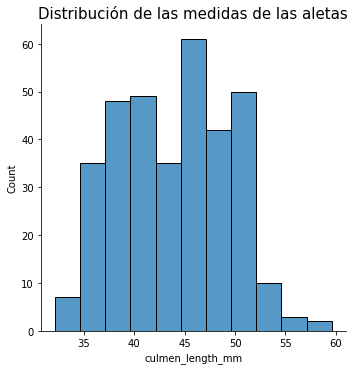

In [7]:
from seaborn import displot
displot(df.culmen_length_mm)
plt.title('Distribución de las medidas de las aletas', fontsize = 15, fontweight = 20)

Text(0.5, 1.0, 'Diagrama de caja de bigotes con los valores de masa corporal')

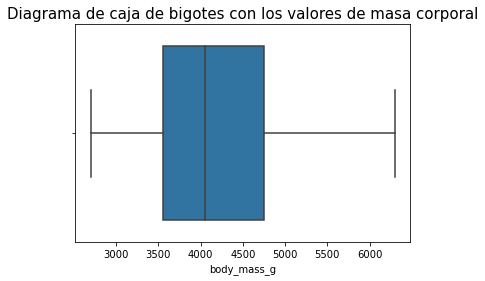

In [8]:
from seaborn import boxplot
boxplot(x =df_actualizado.body_mass_g)
plt.title('Diagrama de caja de bigotes con los valores de masa corporal', fontsize = 15, fontweight = 20)

Text(0.5, 1.0, 'Cantidad de muestras por especie')

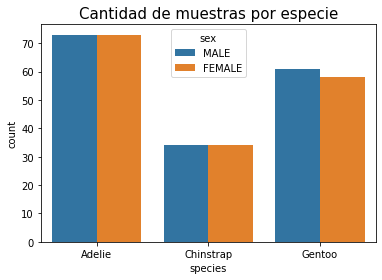

In [9]:
sns.countplot(x= df_actualizado['species'], hue=df_actualizado['sex'])
plt.title('Cantidad de muestras por especie', fontsize = 15, fontweight = 20)

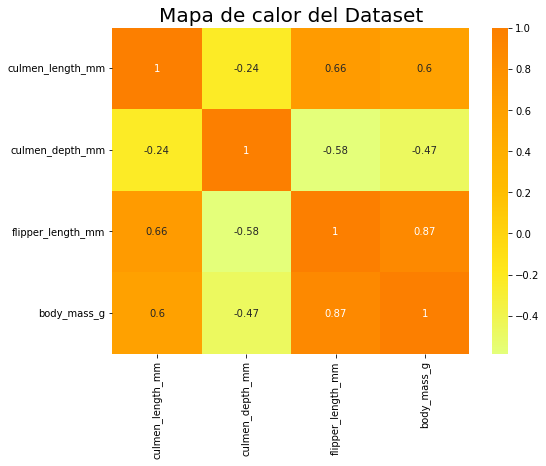

In [10]:
plt.rcParams['figure.figsize'] = (8,6)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Mapa de calor del Dataset', fontsize = 20)
plt.show()

## Analisis de las variables en función de otras.

Text(0.5, 1.0, 'Relacion entre el largo de aleta y la masa corporal')

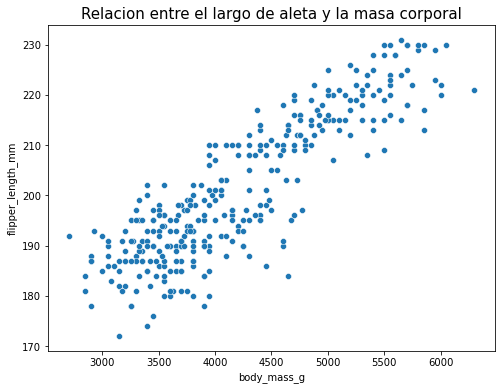

In [11]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=data)
plt.title('Relacion entre el largo de aleta y la masa corporal', fontsize = 15 , fontweight = 20)

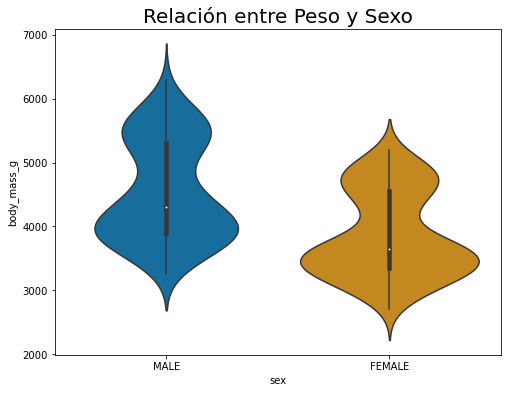

In [12]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.violinplot( x = data['sex'], y = data['body_mass_g'], palette='colorblind')
plt.title('Relación entre Peso y Sexo', fontsize = 20, fontweight = 30)
plt.show()

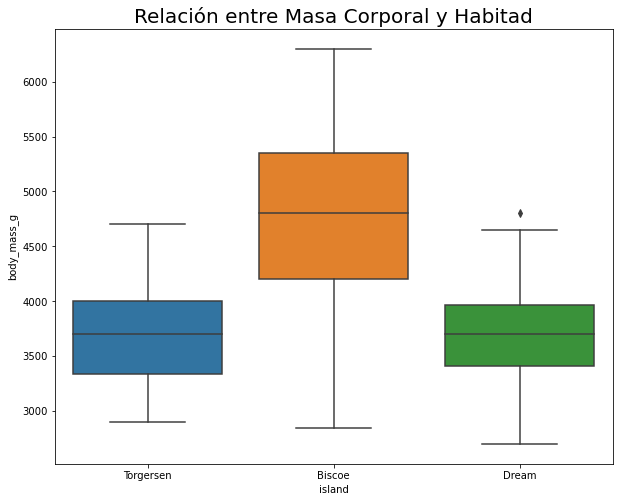

In [13]:
plt.figure(figsize=(10,8)) 
sns.boxplot(y = 'body_mass_g', x = 'island', data = data)
plt.title('Relación entre Masa Corporal y Habitad', fontsize = 20, fontweight = 30)
plt.show()

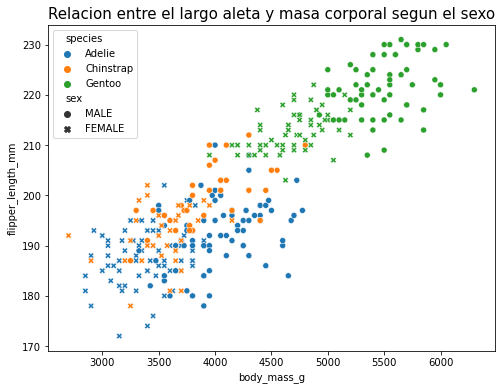

In [14]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=data, hue="species" ,style="sex")
plt.title('Relacion entre el largo aleta y masa corporal segun el sexo',
          fontsize = 15,fontweight = 25)
plt.show()

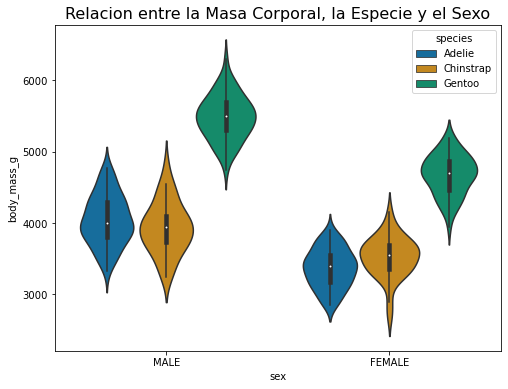

In [15]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.violinplot( x = data['sex'], y = data['body_mass_g'], palette='colorblind',hue=data['species'])
plt.title('Relacion entre la Masa Corporal, la Especie y el Sexo', fontsize = 16, fontweight = 25)
plt.show()

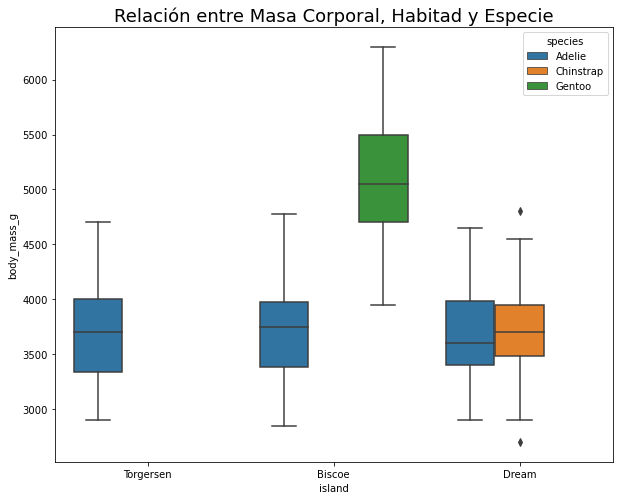

In [16]:
plt.figure(figsize=(10,8)) 
sns.boxplot(y = 'body_mass_g', x = 'island', data = data , hue="species")
plt.title('Relación entre Masa Corporal, Habitad y Especie', fontsize = 18, fontweight = 25)
plt.show()

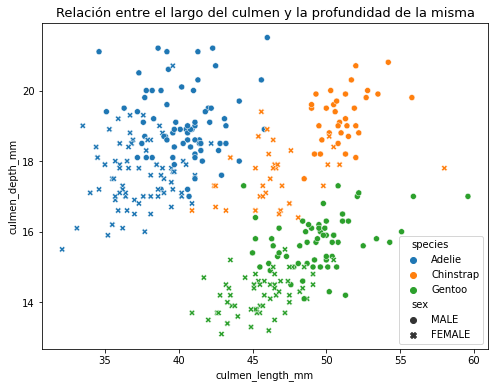

In [17]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=data, hue="species" ,style="sex")
plt.title('Relación entre el largo del culmen y la profundidad de la misma',
          fontsize = 13,fontweight = 40)
plt.show()

### Analisis multivariado

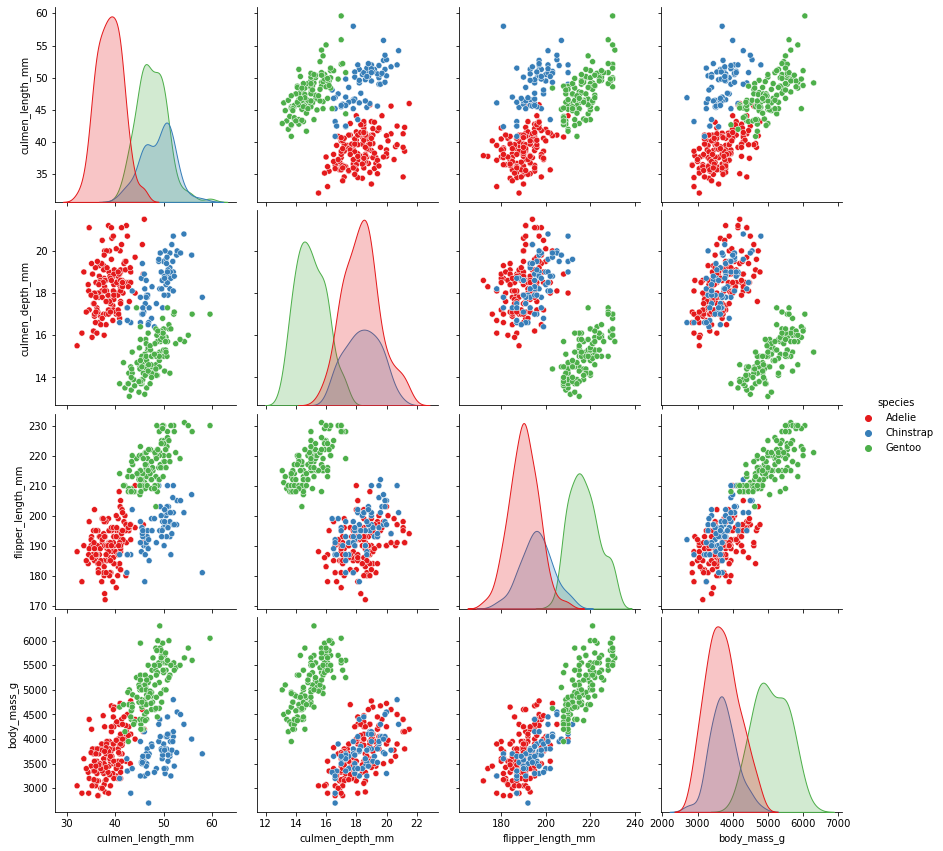

In [18]:
sns.pairplot(data= data,hue = 'species' , height = 3 , palette = 'Set1')

### Conclusiones:
1. Se puede observar que en las 3 especies se verifica que las caracteristicas de los pinguinos hembra son de menor tamaño que las de los machos
2. Que la data es suficiente y representativa
3. Ademas los pinguinos presentan unas caracteristicas bien diferenciadas que permiten poder realizar un algoritmo que permita identificarlos.
4. Las variables perfectas para realizar esta labor consta del largo del culmen y la profundidad del mismo

# Predicción de datos 

## Metodo de K Vecinos cercanos.

Se crean unos datos para testear el algoritmo, los campos a utilizar son la profundidad del culmen y el largo del mismo, luego se realiza el graficado y se utiliza el metodo de Knn con un numero de vecinos cercanos en 5.

In [19]:
test1 = {'culmen_length_mm': [45],
        'culmen_depth_mm': [18.5]}
test2 = {'culmen_length_mm': [52],
        'culmen_depth_mm': [20]}
test3 = {'culmen_length_mm': [35],
        'culmen_depth_mm': [16]}          

test1 = pd.DataFrame(test1)
test2 = pd.DataFrame(test2)
test3 = pd.DataFrame(test3)


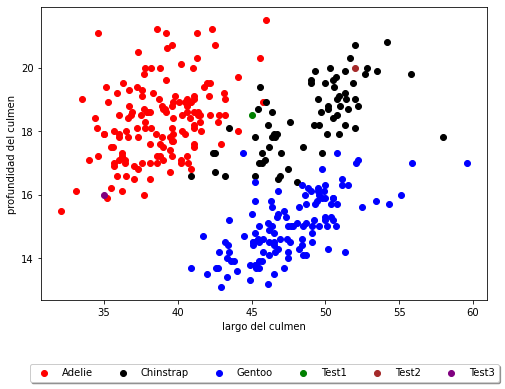

In [20]:
ax = plt.axes()

ax.scatter(data.loc[data['species'] == 'Adelie', 'culmen_length_mm'],
           data.loc[data['species'] == 'Adelie', 'culmen_depth_mm'],
           c="red",
           label="Adelie")
ax.scatter(data.loc[data['species'] == 'Chinstrap', 'culmen_length_mm'],
           data.loc[data['species'] == 'Chinstrap', 'culmen_depth_mm'],
           c="black",
           label="Chinstrap")
ax.scatter(data.loc[data['species'] == 'Gentoo', 'culmen_length_mm'],
           data.loc[data['species'] == 'Gentoo', 'culmen_depth_mm'],
           c="blue",
           label="Gentoo")
ax.scatter(test1.culmen_length_mm,
           test1.culmen_depth_mm,
           c="green",
           label="Test1")
ax.scatter(test2.culmen_length_mm,
           test2.culmen_depth_mm,
           c="brown",
           label="Test2")
ax.scatter(test3.culmen_length_mm,
           test3.culmen_depth_mm,
           c="purple",
           label="Test3")
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=6)

plt.xlabel("largo del culmen")
plt.ylabel("profundidad del culmen")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=5)

X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data.species

(X_train, X_test,y_train, y_test) = train_test_split(X, y, stratify=y , test_size=0.30,
                                                     random_state=11)

knn.fit(X_train, y_train)

KNeighborsClassifier()

Se realiza la prediccion de los tres valores creados para propositos de prueba y luego realizamos un test de precision y vemos que el porcentaje de aciertos es muy elevado, siendo un %96.

In [22]:
prediccion1 = knn.predict(test1)
print("Test 1: " + prediccion1)

prediccion2 = knn.predict(test2)
print("Test 2: " + prediccion2)

prediccion3 = knn.predict(test3)
print("Test 3: " +prediccion3)

['Test 1: Chinstrap']
['Test 2: Chinstrap']
['Test 3: Adelie']


In [23]:
y_test_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de evaluación: 0.96


## matriz de confusión

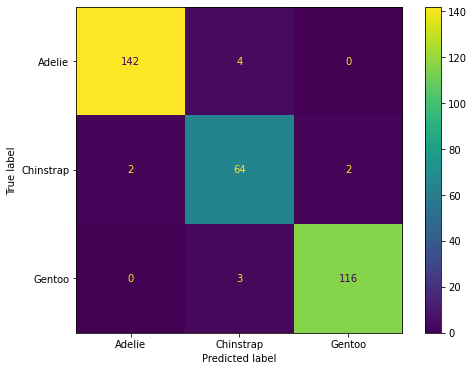

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predicted = knn.predict(X)
cm = confusion_matrix(y, y_predicted,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

## Metodo de arboles de decision.



Se implementa un clasificador de arboles de decision y se chequean los valores de precision,donde podemos observar una mejoria en comparación con el metodo anterior, casi logrando precisión perfecta siendo esta un %97.
Esto se debe a la incorporación de mas features para el entrenamiento del algoritmo.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier

X = data[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = data["species"]

(X_train, X_test,y_train, y_test) = train_test_split(X, y, stratify=y , test_size=0.30,
                                                     random_state=11)

In [27]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.97


### Optimización de Hyperparametros



hacemos un print de los valores utilizados en el modelo actual

In [30]:
print("parametros del modelo actual")
print(model.get_params())

parametros del modelo actual
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


In [31]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 5),
              "criterion": ["gini", "entropy"]}

 # Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(model, param_dist, cv = 5)
  
tree_cv.fit(X, y)             

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.9789687924016282


Como podemos observar los parametros idoneos para este set de datos son estos: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2}  

---

mejorando el accuracy a %98,5 lo que es un percentil y medio mas que el modelo default


## Matriz de confusión

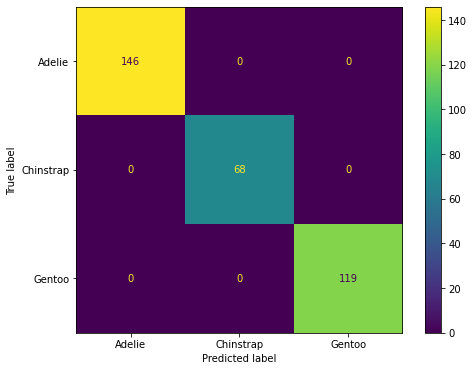

In [32]:
y_predic = tree_cv.predict(X)
cm = confusion_matrix(y, y_predic,labels=tree_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_cv.classes_)
disp.plot()
plt.show()

# Resoluciones:


 Podemos determinar que el mejor metodo para poder definir la especie de los pinguinos ,solo con las features elegidas, corresponde al metodo de RandomForest.
 
 Esta solucion se ajusta a la realidad ya que los datos como el peso del pinguino pueden ser inferidos por su largo y ancho al ser captados por camara.

 De no ser posible esa solución ,ya que crear un programa capas de detectar estas caracteristica por camaras en situación de nevada y otras cuestiones puede llegar a ser complicado, las mediciones de estas features en los animales no presentaría un problema para cualquier persona por lo tanto permitiendo que se pueda contratar personas sin experiencia, que sin conocer las caracteristicas distintivas de los animales (como color o patrones del plumaje por ej.), puedan realizar un control de estos mismos permitiendo cumplir el objetivo de llevar un control poblacional. 